# Import modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
import re
pwd = ! pwd
pwd = re.sub('notebooks/1-notebooks_prepare_HCC_data', '', pwd[0])
pwd

'/home/jovyan/work/'

In [23]:
# Tune the visual settings for figures in seaborn
sns.set_context(
    "notebook", font_scale=1.2, rc={"figure.figsize": (8, 6), "axes.titlesize": 15}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 8, 6

sns.set_theme(style="darkgrid")

# Import data

## Below are all the peak tables we prepared in the previous notebooks

In [6]:
for file in os.listdir(pwd + 'data/prepare_HCC_data/usable_peakTables'):
    
    if file.endswith('.csv') :
        
        print(file)
        print(f"shape : {pd.read_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/' + file, sep=',', decimal='.', na_values=np.nan, low_memory=False).shape}")
        print()

peakTable-Agilent-186_samples.csv
shape : (189, 2160)

peakTable-Agilent_and_metadata-final-inner_merge.csv
shape : (229, 2160)

peakTable-Agilent_and_metadata-final-outer_merge.csv
shape : (937, 2160)

peakTable-Agilent_and_metadata-original-inner_merge.csv
shape : (258, 1245)

peakTable-Agilent_and_metadata-original-outer_merge.csv
shape : (934, 1245)

peakTable-Agilent_and_metadata-unfiltered-inner_merge.csv
shape : (258, 2303)

peakTable-Agilent_and_metadata-unfiltered-outer_merge.csv
shape : (934, 2303)

peakTable-metaboigniter-186_samples-remove_corr.csv
shape : (186, 1281)

peakTable-metaboigniter-186_samples.csv
shape : (186, 1501)

peakTable-metaboigniter_and_metadata-inner_merge.csv
shape : (186, 1501)

peakTable-metaboigniter_and_metadata-outer_merge.csv
shape : (934, 1501)



## For further analysis, we will use :

- ### <code>peakTable-Agilent-186_samples.csv</code> : Agilent peak table and all metadata (189 rows for 186 samples + 3 Blanks)
- ### <code>peakTable-metaboigniter-186_samples.csv</code> : metaboigniter peak table and all metadata (same 186 samples)
- ### <code>peakTable-metaboigniter-186_samples-remove_corr.csv</code> : metaboigniter peak table and all metadata (same 186 samples and strongly correlated features removed)

In [11]:
peakTable_Agilent = pd.read_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-Agilent-186_samples.csv', sep=',', decimal='.',
                                na_values=np.nan, low_memory=False)

print(peakTable_Agilent.shape)
peakTable_Agilent.head()

(189, 2160)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,NaN,NaN,NaN,NaN,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Blank_101,EPIC_Liver_Cancer_NR160614_101_Blank_101,NaN,NaN,NaN,NaN,...,NaN,NaN,1429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Blank_201,EPIC_Liver_Cancer_NR160614_201_Blank_201,NaN,NaN,NaN,NaN,...,NaN,NaN,1685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,...,NaN,98959.0,20987.0,178906.0,NaN,184072.0,2547.0,6454.0,NaN,149023.0
4,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,...,2414.0,93145.0,28323.0,NaN,NaN,NaN,1043.0,6390.0,403011.0,164386.0


In [13]:
peakTable_metaboigniter = pd.read_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-metaboigniter-186_samples-remove_corr.csv',
                                      sep=',', decimal='.', na_values=np.nan, low_memory=False)
print(peakTable_metaboigniter.shape)
peakTable_metaboigniter.head()

(186, 1281)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,13.194216,12.885181,NaN,13.330208,12.052252,12.568647,13.192848,12.248590,12.114328,12.355017
1,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,...,12.700734,12.742979,11.929552,13.464403,13.020365,12.928643,13.697314,12.604052,NaN,12.208084
2,4.0,41.0,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,...,12.618229,12.485436,11.709115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,41.0,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,...,12.720631,12.564338,NaN,13.397322,NaN,NaN,13.086805,NaN,11.605353,12.319119
4,2.0,21.0,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,...,12.564943,12.344968,12.127879,NaN,NaN,NaN,NaN,12.349830,11.926237,NaN


In [162]:
peakTable_metaboigniter.columns[:20]

Index(['country', 'Center', 'Idepic_Bio', 'Idepic_Samp', 'SampleID', 'Id_Bma',
       'Id Aliquot', 'CaseCtrl', 'ID_split_HCC', 'Idepic', 'Match_Caseset',
       'Case_HCC_Wide', 'Typ_Tumo', 'A_Imputation_', 'Match_Round',
       'Match_Ctrlnum', 'Country', 'Vit_Stat', 'D_Dthlst', 'D_Endfup'],
      dtype='object')

# Keep only metadata columns

In [59]:
metadata = peakTable_metaboigniter.iloc[:, ['variable_' not in col for col in peakTable_metaboigniter.columns]]
metadata.head()

,country,Center,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,0.0,1.754415,1.404415,4.073144,1.0,1.0,0.0,1.0,2.0,1.158730
1,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,...,0.0,-0.038618,-0.388618,0.677993,0.0,1.0,0.0,0.0,1.0,1.000000
2,4.0,41.0,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,...,1.0,1.284089,NaN,3.611377,1.0,0.0,2.0,0.0,2.0,0.857418
3,4.0,41.0,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,...,0.0,1.053347,0.863347,2.371083,1.0,0.0,2.0,1.0,3.0,0.837792
4,2.0,21.0,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,...,1.0,0.009881,NaN,1.009930,0.0,0.0,2.0,0.0,2.0,1.134635


# Import metadata file for explanations

In [18]:
metadata_explanations = pd.read_csv(pwd + 'data/prepare_HCC_data/Data_Dict_Live_Caco.csv', sep=',', decimal='.',
                                    na_values=np.nan, low_memory=False)
metadata_explanations.head(50)

,#,Variable,Label,Type,Length,Format,Value code,Value label
0,114.0,A_1_Ftp,Age at first full term pregnancy,Num,8.0,3.,NaN,NaN
1,103.0,A_1_Per_Aggr,Age at first menstrual period (aggregated),Num,8.0,3.,NaN,NaN
2,113.0,A_1_Pregnancy,Age at first of all pregnancy,Num,8.0,3.,NaN,NaN
3,63.0,A_Gallst,Age gallstones,Num,8.0,2.,NaN,NaN
4,86.0,A_Giv_Cig_Aggr,Age give up smoking cigarettes (aggregated),Num,8.0,3.,NaN,NaN
5,85.0,A_Giv_Smok_Aggr,Age give up smoking (aggregated),Num,8.0,3.,NaN,NaN
6,59.0,A_Hyperl,Age hyperlipidaemia (high blood lipids),Num,8.0,2.,NaN,NaN
7,56.0,A_Hypert,Age hypertension (high blood pressure),Num,8.0,2.,NaN,NaN
8,115.0,A_Menopause,Age at menopause,Num,8.0,3.,NaN,NaN
9,105.0,A_Pill_Aggr,Age when you started using the pill (aggregated),Num,8.0,3.,NaN,NaN


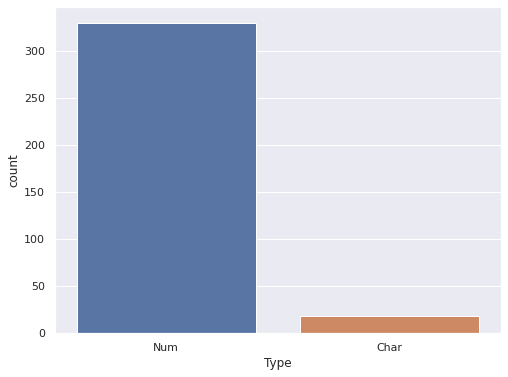

In [24]:
sns.countplot(x='Type', data=metadata_explanations);

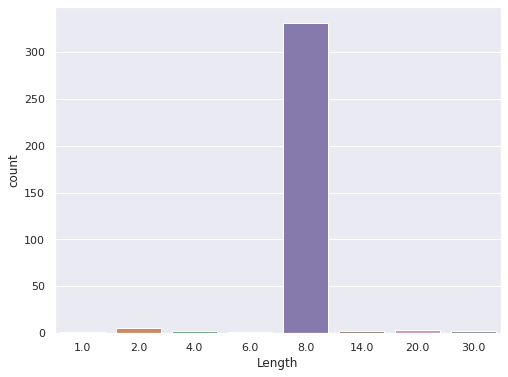

In [25]:
sns.countplot(x='Length', data=metadata_explanations);

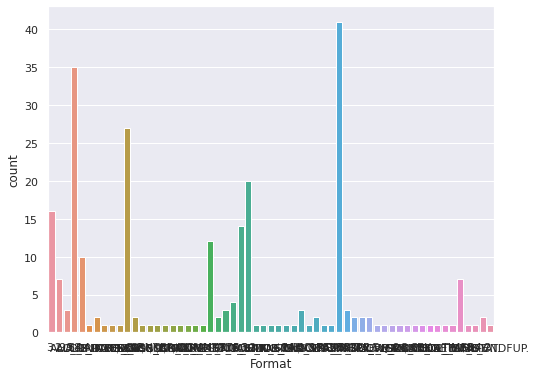

In [26]:
sns.countplot(x='Format', data=metadata_explanations);

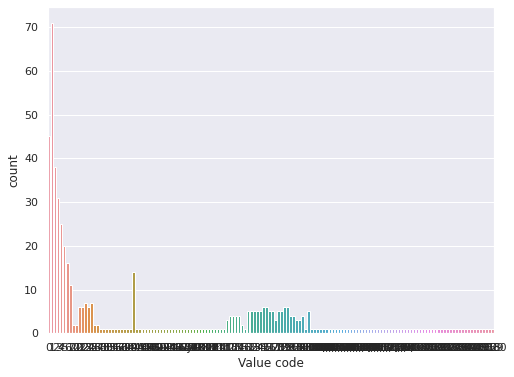

In [27]:
sns.countplot(x='Value code', data=metadata_explanations);

## We have to keep only relevant metadata columns

### For that, we will subset columns containing specific substrings with keywords and regex. The regex below will match columns with parenthesis containing units, which are most likely to be linked to blood measurements. We also subset these ones to have mostly quantitative variables (at least for now)

### We also have to keep important columns such as *Age at blood collection*, *Liver cancer case/control status*, *Coordinating center*, ...

In [194]:

kept_labels = ['Age at blood collection', 'Liver cancer case/control status', 'Coordinating center', 'Center definition (B)', \
                'Center definition (C)', 'Center definition (D)', 'Center definition (E)', 'Country', 'Date of birth', \
                'Date of blood collection', 'Date of diagnosis of the tumour', 'Date of death/emigration/lost', 'Date end of follow-up', \
                'Date of recruitment', 'Diabetes', 'Grading of the tumour', 'Unique EPIC subject ID', 'Unique EPIC blood collection ID', \
                'Matching caseset number', 'Matching control number within a caseset', 'Morphology of the tumour', \
                'Lifetime Nb cigarettes/day', 'Person-years', 'Qualifier of the originating cause of death', \
                'Source of information cancer diagnosis 1', 'Sex', 'Site of the tumour', 'Smoking status', \
                'Stage of the tumour, EPIC classification', 'Classification of the tumour', 'Vital status']
print(len(kept_labels))
print()
kept_labels_init = kept_labels.copy()

kept_variables = []
print(len(kept_variables))
print()

print(100 * '-')
print()


keywords = ['blood', 'diet', 'pressure', 'lipid', 'body', 'height', 'weight', 'diastolic', 'systolic', 'BMI']

keywords_case_sensitive = ['Ig', 'IGF', 'IL']

keywords_diet = ['QgE', 'Wcrf']

list_regex = [r'[\(\[](.*?\/.*?|%)[\)\]]']



for keyword in keywords:
    print(keyword)
    list_col = metadata_explanations['Label'][metadata_explanations['Label'].str.contains(keyword, na=False, case=False)].values.tolist()
    print(len(list_col))
    print(list_col)
    kept_labels.extend(list_col)
    print()

print(100 * '-')
print(len(kept_labels))
print(kept_labels)
print(100 * '-')
print()
    
for keyword in keywords_case_sensitive:
    print(keyword)
    list_col = metadata_explanations['Label'][metadata_explanations['Label'].str.contains(keyword, na=False)].values.tolist()
    print(len(list_col))
    print(list_col)
    kept_labels.extend(list_col)
    print()

print(100 * '-')
print(len(kept_labels))
print(kept_labels)
print(100 * '-')
print()

for keyword in keywords_diet:
    print(keyword)
    list_col = metadata_explanations['Variable'][metadata_explanations['Variable'].str.contains(keyword, na=False, case=False)].values.tolist()
    print(len(list_col))
    print(list_col)
    kept_variables.extend(list_col)
    print()
    
    
print(100 * '-')
print(len(kept_variables))
print(kept_variables)
print(100 * '-')
print()
    
for regex in list_regex:
    print(regex)
    list_col = metadata_explanations['Label'][metadata_explanations['Label'].str.contains(regex, na=False, regex=True)].values.tolist()
    print(len(list_col))
    print(list_col)
    kept_labels.extend(list_col)
    print()
    
print(100 * '-')
print(len(kept_labels))
print(kept_labels)
print(100 * '-')
print(len(kept_variables))
print(kept_variables)
print(100 * '-')
print()
    


31

0

----------------------------------------------------------------------------------------------------

blood
16
['Age hyperlipidaemia (high blood lipids)', 'Age hypertension (high blood pressure)', 'Age at blood collection', 'Undergone blood pressure exam', 'Date of blood collection', 'Date of blood pressure exam', 'Date of blood refrigerating', 'Hyperlipidaemia (high blood lipids)', 'Hypertension (high blood pressure)', 'Unique EPIC blood collection ID', 'Length of follow-up from blood collection', 'Menopausal status at blood collection', 'Use of pill/hrt-ert at blood collection', 'Time of blood collection', 'Time of blood refrigerating', 'Technique used to measure blood pressure']

diet
1
['DQ ENDB Total dietary fibre (g)']

pressure
5
['Age hypertension (high blood pressure)', 'Undergone blood pressure exam', 'Date of blood pressure exam', 'Hypertension (high blood pressure)', 'Technique used to measure blood pressure']

lipid
3
['Age hyperlipidaemia (high blood lipids)', 'Hyp

/tmp/ipykernel_17541/346435204.py:76: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  list_col = metadata_explanations['Label'][metadata_explanations['Label'].str.contains(regex, na=False, regex=True)].values.tolist()


In [195]:
print(f'From {metadata.shape[1]} metadata colums, we only keep {len(kept_labels) + len(kept_variables)} variables for further analysis !')

From 944 metadata colums, we only keep 192 variables for further analysis !


In [196]:
len(list(set(kept_labels)))

138

In [197]:
len(list(set(kept_variables)))

38

# Subset metadata with only relevant columns

In [198]:
metadata_explanations_labels = metadata_explanations[metadata_explanations['Label'].isin(list(set(kept_labels)))]
print(metadata_explanations_labels.shape)
metadata_explanations_labels.head()

(140, 8)


,#,Variable,Label,Type,Length,Format,Value code,Value label
6,59.0,A_Hyperl,Age hyperlipidaemia (high blood lipids),Num,8.0,2.,NaN,NaN
7,56.0,A_Hypert,Age hypertension (high blood pressure),Num,8.0,2.,NaN,NaN
13,315.0,Adipo_LIVE_02,Adiponectin (µg/ml),Num,8.0,NaN,NaN,NaN
14,321.0,Afp_LIVE_03,Alpha-Feto protein (kIU/l),Num,8.0,NaN,NaN,NaN
15,46.0,Age_Blood,Age at blood collection,Num,8.0,9.5,NaN,NaN


In [199]:
metadata_explanations_variables = metadata_explanations[metadata_explanations['Variable'].isin(list(set(kept_variables)))]
print(metadata_explanations_variables.shape)
metadata_explanations_variables.head()

(38, 8)


,#,Variable,Label,Type,Length,Format,Value code,Value label
626,195.0,QgE01,Potatoes and other tubers,Num,8.0,NaN,NaN,NaN
627,196.0,QgE02,Vegetables,Num,8.0,NaN,NaN,NaN
628,197.0,QgE03,Legumes,Num,8.0,NaN,NaN,NaN
629,198.0,QgE04,"Fruits, nuts and seeds",Num,8.0,NaN,NaN,NaN
630,199.0,QgE05,Dairy products,Num,8.0,NaN,NaN,NaN


In [200]:
metadata_explanations_concat = pd.concat([metadata_explanations_labels, metadata_explanations_variables], axis=0)
metadata_explanations_concat

,#,Variable,Label,Type,Length,Format,Value code,Value label
6,59.0,A_Hyperl,Age hyperlipidaemia (high blood lipids),Num,8.0,2.,NaN,NaN
7,56.0,A_Hypert,Age hypertension (high blood pressure),Num,8.0,2.,NaN,NaN
13,315.0,Adipo_LIVE_02,Adiponectin (µg/ml),Num,8.0,NaN,NaN,NaN
14,321.0,Afp_LIVE_03,Alpha-Feto protein (kIU/l),Num,8.0,NaN,NaN,NaN
15,46.0,Age_Blood,Age at blood collection,Num,8.0,9.5,NaN,NaN
...,...,...,...,...,...,...,...,...
782,258.0,Wcrf_Meat,"Consume less than 500g/week of meat, very litt...",Num,8.0,NaN,NaN,NaN
783,268.0,Wcrf_Meat_Cal,"Consume less than 500g/week of meat, very litt...",Num,8.0,NaN,NaN,NaN
784,251.0,Wcrf_Pa,Be moderately physically active,Num,8.0,NaN,NaN,NaN
785,257.0,Wcrf_Pf,Eat mostly foods of plant origin,Num,8.0,NaN,NaN,NaN


### Before subsetting and to avoid errors, we will check if relevant metadata variables that we want to keep are indeed all present in the metadata. Below are the kept variables from the explanation files which are not in the metadata

In [201]:
not_in_metadata = list(set(metadata_explanations_concat['Variable']) - set(metadata.columns))

print(len(not_in_metadata))
not_in_metadata[:10]

40


['Lps_Iga_LIVE_06',
 'Alc_Spir',
 'QgE11',
 'Cpeptide_LIVE_02',
 'QgE16',
 'Flic_Igg_LIVE_06',
 'QgE09',
 'Alc_Beer',
 'QE_FIBT',
 'Selenium_LIVE_10']

### There are 40 variables which are not in the metadata (only displayed 10 of them). We will remove them to avoid errors later

In [202]:
metadata_explanations_concat_2 = metadata_explanations_concat[~metadata_explanations_concat['Variable'].isin(not_in_metadata)]
metadata_explanations_concat_2

,#,Variable,Label,Type,Length,Format,Value code,Value label
6,59.0,A_Hyperl,Age hyperlipidaemia (high blood lipids),Num,8.0,2.,NaN,NaN
7,56.0,A_Hypert,Age hypertension (high blood pressure),Num,8.0,2.,NaN,NaN
13,315.0,Adipo_LIVE_02,Adiponectin (µg/ml),Num,8.0,NaN,NaN,NaN
14,321.0,Afp_LIVE_03,Alpha-Feto protein (kIU/l),Num,8.0,NaN,NaN,NaN
15,46.0,Age_Blood,Age at blood collection,Num,8.0,9.5,NaN,NaN
...,...,...,...,...,...,...,...,...
782,258.0,Wcrf_Meat,"Consume less than 500g/week of meat, very litt...",Num,8.0,NaN,NaN,NaN
783,268.0,Wcrf_Meat_Cal,"Consume less than 500g/week of meat, very litt...",Num,8.0,NaN,NaN,NaN
784,251.0,Wcrf_Pa,Be moderately physically active,Num,8.0,NaN,NaN,NaN
785,257.0,Wcrf_Pf,Eat mostly foods of plant origin,Num,8.0,NaN,NaN,NaN


### Finally we subset the relevant metadata

In [203]:
metadata_relevant = metadata.loc[:, metadata_explanations_concat_2['Variable']]
metadata_relevant

,A_Hyperl,A_Hypert,Adipo_LIVE_02,Afp_LIVE_03,Age_Blood,Alat_LIVE_03,Alb_LIVE_03,Alc_20,Alc_30,Alc_40,...,Wcrf_Fibt_Cal,Wcrf_Fv,Wcrf_Fv_Cal,Wcrf_Fwg,Wcrf_Fwg_Cal,Wcrf_Meat,Wcrf_Meat_Cal,Wcrf_Pa,Wcrf_Pf,Wcrf_Pf_Cal
0,NaN,NaN,2.48,3.8,72.994,63.0,45.0,23.3566,0.0000,NaN,...,1.0,1.0,0.5,0.50,0.50,0.0,0.0,0.0,1.00,0.75
1,NaN,NaN,10.10,2.1,72.966,16.0,39.0,NaN,NaN,NaN,...,0.5,0.5,0.0,0.50,0.50,0.5,0.5,0.0,0.50,0.25
2,NaN,NaN,NaN,NaN,53.977,NaN,NaN,7.1915,7.1915,NaN,...,0.0,1.0,0.5,0.50,0.50,0.5,0.5,0.0,0.75,0.25
3,NaN,NaN,NaN,NaN,53.544,NaN,NaN,1.1213,3.2143,NaN,...,1.0,1.0,1.0,0.00,0.00,0.5,0.5,0.5,1.00,1.00
4,NaN,NaN,NaN,NaN,64.559,NaN,NaN,0.0000,0.0000,0.0000,...,0.5,1.0,1.0,1.00,1.00,1.0,1.0,0.0,0.75,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,45.0,61.0,2.94,1.7,66.445,19.0,42.0,0.0000,0.0000,0.0000,...,0.0,0.5,0.5,0.50,0.50,0.5,0.5,0.0,0.50,0.25
182,NaN,NaN,NaN,NaN,71.619,NaN,NaN,1.8922,1.8922,1.8922,...,1.0,1.0,1.0,0.75,0.75,0.0,0.0,0.0,1.00,1.00
183,NaN,65.0,NaN,NaN,71.543,NaN,NaN,0.0000,26.5957,26.5957,...,0.5,1.0,1.0,0.75,0.75,0.0,0.0,1.0,0.75,0.75
184,30.0,50.0,4.35,NaN,51.340,NaN,NaN,59.5322,63.3421,63.3421,...,0.5,0.0,0.5,0.00,0.00,0.0,0.0,0.0,0.25,0.50


### Order columns in a practical way

In [216]:
for col in ['country', 'Center', 'Idepic_Bio', 'Idepic_Samp', 'SampleID', 'Id_Bma',
       'Id Aliquot', 'CaseCtrl', 'ID_split_HCC', 'Idepic', 'Match_Caseset',
       'Case_HCC_Wide', 'Typ_Tumo']:
    print(col, ':', col in metadata_relevant.columns)

country : False
Center : False
Idepic_Bio : True
Idepic_Samp : False
SampleID : False
Id_Bma : False
Id Aliquot : False
CaseCtrl : False
ID_split_HCC : False
Idepic : True
Match_Caseset : True
Case_HCC_Wide : False
Typ_Tumo : True


In [250]:
metadata_relevant_ordered = pd.concat([
    metadata[['SampleID', 'Id_Bma']],
    metadata_relevant[['Idepic', 'Idepic_Bio']],
    metadata[['Idepic_Samp', 'Id Aliquot', 'CaseCtrl']],
    metadata_relevant[['Typ_Tumo', 'Match_Caseset']],
    metadata[['Case_HCC', 'Case_HCC_Wide']],
    metadata_relevant[metadata_explanations_concat_2[metadata_explanations_concat_2['Label'].isin(kept_labels_init)]['Variable'].tolist()],
    metadata_relevant[metadata_explanations_concat_2[~metadata_explanations_concat_2['Label'].isin(kept_labels_init)]['Variable'].tolist()]
    ],
          axis=1)

metadata_relevant_ordered

,SampleID,Id_Bma,Idepic,Idepic_Bio,Idepic_Samp,Id Aliquot,CaseCtrl,Typ_Tumo,Match_Caseset,Case_HCC,...,Wcrf_Fibt_Cal,Wcrf_Fv,Wcrf_Fv_Cal,Wcrf_Fwg,Wcrf_Fwg_Cal,Wcrf_Meat,Wcrf_Meat_Cal,Wcrf_Pa,Wcrf_Pf,Wcrf_Pf_Cal
0,LivCan_153,41-LivCan_153,41____41041872,41____41041872,41041872-s2#C1,41041872-s2#C,Incident,HCC/,82.0,Yes,...,1.0,1.0,0.5,0.50,0.50,0.0,0.0,0.0,1.00,0.75
1,LivCan_154,41-LivCan_154,41____41046868,41____41046868,41046868-s2#C1,41046868-s2#C,Non-case,NaN,82.0,No,...,0.5,0.5,0.0,0.50,0.50,0.5,0.5,0.0,0.50,0.25
2,LivCan_267,41-LivCan_267,41____41074588,41____41074588,41074588-s1#B1,41074588-s1#B,Incident,HCC/,427.0,Yes,...,0.0,1.0,0.5,0.50,0.50,0.5,0.5,0.0,0.75,0.25
3,LivCan_268,41-LivCan_268,41____41089214,41____41089214,41089214-s1#B1,41089214-s1#B,Non-case,NaN,427.0,No,...,1.0,1.0,1.0,0.00,0.00,0.5,0.5,0.5,1.00,1.00
4,LivCan_299,21-LivCan_299,21____21103888,21____21103888,21103888-s1#B1,21103888-s1#B,Incident,HCC_Wide/,376.0,No,...,0.5,1.0,1.0,1.00,1.00,1.0,1.0,0.0,0.75,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,LivCan_080,275_32-LivCan_080_275,32____3208004E,32____32253231,32253231-s3#C1,32253231-s3#C,Non-case,NaN,56.0,No,...,0.0,0.5,0.5,0.50,0.50,0.5,0.5,0.0,0.50,0.25
182,LivCan_375,281_22-LivCan_375_281,22____22281416,22____22281416,22281416-s1#B1,22281416-s1#B,Incident,HCC/,383.0,Yes,...,1.0,1.0,1.0,0.75,0.75,0.0,0.0,0.0,1.00,1.00
183,LivCan_376,282_22-LivCan_376_282,22____22281701,22____22281701,22281701-s1#B1,22281701-s1#B,Non-case,NaN,383.0,No,...,0.5,1.0,1.0,0.75,0.75,0.0,0.0,1.0,0.75,0.75
184,LivCan_165,283_71-LivCan_165_283,71____71000825,71____71000065,71000065-s2#C1,71000065-s2#C,Incident,HCC/,147.0,Yes,...,0.5,0.0,0.5,0.00,0.00,0.0,0.0,0.0,0.25,0.50


### Some columns are still dupliacted so we remove them

In [280]:
metadata_relevant_ordered_without_dup = metadata_relevant_ordered.loc[:,~metadata_relevant_ordered.columns.duplicated()]
metadata_relevant_ordered_without_dup

SampleID_full = peakTable_Agilent['SampleID_full'][3:]
SampleID_full.index = range(len(SampleID_full))
metadata_relevant_ordered_without_dup.insert(0, 'SampleID_full', SampleID_full)
metadata_relevant_ordered_without_dup

,SampleID_full,SampleID,Id_Bma,Idepic,Idepic_Bio,Idepic_Samp,Id Aliquot,CaseCtrl,Typ_Tumo,Match_Caseset,...,Wcrf_Ed,Wcrf_Fv,Wcrf_Fv_Cal,Wcrf_Fwg,Wcrf_Fwg_Cal,Wcrf_Meat,Wcrf_Meat_Cal,Wcrf_Pa,Wcrf_Pf,Wcrf_Pf_Cal
0,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,LivCan_153,41-LivCan_153,41____41041872,41____41041872,41041872-s2#C1,41041872-s2#C,Incident,HCC/,82.0,...,0.5,1.0,0.5,0.50,0.50,0.0,0.0,0.0,1.00,0.75
1,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,LivCan_154,41-LivCan_154,41____41046868,41____41046868,41046868-s2#C1,41046868-s2#C,Non-case,NaN,82.0,...,0.5,0.5,0.0,0.50,0.50,0.5,0.5,0.0,0.50,0.25
2,EPIC_Liver_Cancer_NR160614_009_41-LivCan_267_009,LivCan_267,41-LivCan_267,41____41074588,41____41074588,41074588-s1#B1,41074588-s1#B,Incident,HCC/,427.0,...,0.5,1.0,0.5,0.50,0.50,0.5,0.5,0.0,0.75,0.25
3,EPIC_Liver_Cancer_NR160614_010_41-LivCan_268_010,LivCan_268,41-LivCan_268,41____41089214,41____41089214,41089214-s1#B1,41089214-s1#B,Non-case,NaN,427.0,...,0.0,1.0,1.0,0.00,0.00,0.5,0.5,0.5,1.00,1.00
4,EPIC_Liver_Cancer_NR160614_014_21-LivCan_299_014,LivCan_299,21-LivCan_299,21____21103888,21____21103888,21103888-s1#B1,21103888-s1#B,Incident,HCC_Wide/,376.0,...,1.0,1.0,1.0,1.00,1.00,1.0,1.0,0.0,0.75,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,EPIC_Liver_Cancer_NR160614_275_32-LivCan_080_275,LivCan_080,275_32-LivCan_080_275,32____3208004E,32____32253231,32253231-s3#C1,32253231-s3#C,Non-case,NaN,56.0,...,0.5,0.5,0.5,0.50,0.50,0.5,0.5,0.0,0.50,0.25
182,EPIC_Liver_Cancer_NR160614_281_22-LivCan_375_281,LivCan_375,281_22-LivCan_375_281,22____22281416,22____22281416,22281416-s1#B1,22281416-s1#B,Incident,HCC/,383.0,...,0.5,1.0,1.0,0.75,0.75,0.0,0.0,0.0,1.00,1.00
183,EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282,LivCan_376,282_22-LivCan_376_282,22____22281701,22____22281701,22281701-s1#B1,22281701-s1#B,Non-case,NaN,383.0,...,0.5,1.0,1.0,0.75,0.75,0.0,0.0,1.0,0.75,0.75
184,EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283,LivCan_165,283_71-LivCan_165_283,71____71000825,71____71000065,71000065-s2#C1,71000065-s2#C,Incident,HCC/,147.0,...,0.0,0.0,0.5,0.00,0.00,0.0,0.0,0.0,0.25,0.50


# Finally we have only relevant metadata for all our samples, we can merge this dataframe with both peak tables

In [282]:
peakTable_metaboigniter_variables = peakTable_metaboigniter.drop(metadata.columns, axis=1)
peakTable_metaboigniter_variables.head()

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,19.761786,14.635833,22.185582,12.615143,15.580604,15.881437,17.500899,12.792893,16.805604,16.805842,...,13.194216,12.885181,NaN,13.330208,12.052252,12.568647,13.192848,12.248590,12.114328,12.355017
1,19.735279,15.193396,20.831414,NaN,15.145423,14.034654,17.953780,NaN,15.907714,14.977232,...,12.700734,12.742979,11.929552,13.464403,13.020365,12.928643,13.697314,12.604052,NaN,12.208084
2,19.116076,15.446714,22.152604,NaN,14.628890,15.316772,17.404715,12.786407,15.947176,16.238502,...,12.618229,12.485436,11.709115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.376875,15.460525,22.169389,12.720767,15.937169,15.967749,15.836957,NaN,16.371211,17.052231,...,12.720631,12.564338,NaN,13.397322,NaN,NaN,13.086805,NaN,11.605353,12.319119
4,19.555938,14.515536,22.150249,12.314019,14.950203,15.294906,16.610171,12.214057,16.171763,16.107590,...,12.564943,12.344968,12.127879,NaN,NaN,NaN,NaN,12.349830,11.926237,NaN


In [283]:
peakTable_metaboigniter_useful_metadata = pd.concat([metadata_relevant_ordered_without_dup, peakTable_metaboigniter_variables], axis=1)
peakTable_metaboigniter_useful_metadata

,SampleID_full,SampleID,Id_Bma,Idepic,Idepic_Bio,Idepic_Samp,Id Aliquot,CaseCtrl,Typ_Tumo,Match_Caseset,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,LivCan_153,41-LivCan_153,41____41041872,41____41041872,41041872-s2#C1,41041872-s2#C,Incident,HCC/,82.0,...,13.194216,12.885181,NaN,13.330208,12.052252,12.568647,13.192848,12.248590,12.114328,12.355017
1,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,LivCan_154,41-LivCan_154,41____41046868,41____41046868,41046868-s2#C1,41046868-s2#C,Non-case,NaN,82.0,...,12.700734,12.742979,11.929552,13.464403,13.020365,12.928643,13.697314,12.604052,NaN,12.208084
2,EPIC_Liver_Cancer_NR160614_009_41-LivCan_267_009,LivCan_267,41-LivCan_267,41____41074588,41____41074588,41074588-s1#B1,41074588-s1#B,Incident,HCC/,427.0,...,12.618229,12.485436,11.709115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EPIC_Liver_Cancer_NR160614_010_41-LivCan_268_010,LivCan_268,41-LivCan_268,41____41089214,41____41089214,41089214-s1#B1,41089214-s1#B,Non-case,NaN,427.0,...,12.720631,12.564338,NaN,13.397322,NaN,NaN,13.086805,NaN,11.605353,12.319119
4,EPIC_Liver_Cancer_NR160614_014_21-LivCan_299_014,LivCan_299,21-LivCan_299,21____21103888,21____21103888,21103888-s1#B1,21103888-s1#B,Incident,HCC_Wide/,376.0,...,12.564943,12.344968,12.127879,NaN,NaN,NaN,NaN,12.349830,11.926237,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,EPIC_Liver_Cancer_NR160614_275_32-LivCan_080_275,LivCan_080,275_32-LivCan_080_275,32____3208004E,32____32253231,32253231-s3#C1,32253231-s3#C,Non-case,NaN,56.0,...,NaN,12.125251,NaN,12.686218,12.349299,11.505004,13.189121,NaN,NaN,NaN
182,EPIC_Liver_Cancer_NR160614_281_22-LivCan_375_281,LivCan_375,281_22-LivCan_375_281,22____22281416,22____22281416,22281416-s1#B1,22281416-s1#B,Incident,HCC/,383.0,...,13.428278,12.629126,12.360380,NaN,12.909283,12.642143,NaN,12.708850,12.462751,12.635066
183,EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282,LivCan_376,282_22-LivCan_376_282,22____22281701,22____22281701,22281701-s1#B1,22281701-s1#B,Non-case,NaN,383.0,...,13.213899,NaN,11.870228,12.680070,12.846355,13.243400,NaN,12.199647,NaN,12.258149
184,EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283,LivCan_165,283_71-LivCan_165_283,71____71000825,71____71000065,71000065-s2#C1,71000065-s2#C,Incident,HCC/,147.0,...,12.442173,12.291946,NaN,NaN,12.477753,11.789382,NaN,11.628154,NaN,NaN


In [284]:
peakTable_metaboigniter_useful_metadata.to_csv(pwd +
                        'data/prepare_HCC_data/usable_peakTables/peakTable-metaboigniter-186_samples-remove_corr-useful_metadata.csv',
                        index = False, header=True)

In [288]:
peakTable_Agilent[peakTable_Agilent['SampleID'].str.contains('Blank_')][metadata_relevant_ordered_without_dup.columns]

,SampleID_full,SampleID,Id_Bma,Idepic,Idepic_Bio,Idepic_Samp,Id Aliquot,CaseCtrl,Typ_Tumo,Match_Caseset,...,Wcrf_Ed,Wcrf_Fv,Wcrf_Fv_Cal,Wcrf_Fwg,Wcrf_Fwg_Cal,Wcrf_Meat,Wcrf_Meat_Cal,Wcrf_Pa,Wcrf_Pf,Wcrf_Pf_Cal
0,EPIC_Liver_Cancer_NR160614_001_Blank_001,Blank_001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EPIC_Liver_Cancer_NR160614_101_Blank_101,Blank_101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EPIC_Liver_Cancer_NR160614_201_Blank_201,Blank_201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
metadata_relevant_ordered_without_dup

,SampleID_full,SampleID,Id_Bma,Idepic,Idepic_Bio,Idepic_Samp,Id Aliquot,CaseCtrl,Typ_Tumo,Match_Caseset,...,Wcrf_Ed,Wcrf_Fv,Wcrf_Fv_Cal,Wcrf_Fwg,Wcrf_Fwg_Cal,Wcrf_Meat,Wcrf_Meat_Cal,Wcrf_Pa,Wcrf_Pf,Wcrf_Pf_Cal
0,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,LivCan_153,41-LivCan_153,41____41041872,41____41041872,41041872-s2#C1,41041872-s2#C,Incident,HCC/,82.0,...,0.5,1.0,0.5,0.50,0.50,0.0,0.0,0.0,1.00,0.75
1,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,LivCan_154,41-LivCan_154,41____41046868,41____41046868,41046868-s2#C1,41046868-s2#C,Non-case,NaN,82.0,...,0.5,0.5,0.0,0.50,0.50,0.5,0.5,0.0,0.50,0.25
2,EPIC_Liver_Cancer_NR160614_009_41-LivCan_267_009,LivCan_267,41-LivCan_267,41____41074588,41____41074588,41074588-s1#B1,41074588-s1#B,Incident,HCC/,427.0,...,0.5,1.0,0.5,0.50,0.50,0.5,0.5,0.0,0.75,0.25
3,EPIC_Liver_Cancer_NR160614_010_41-LivCan_268_010,LivCan_268,41-LivCan_268,41____41089214,41____41089214,41089214-s1#B1,41089214-s1#B,Non-case,NaN,427.0,...,0.0,1.0,1.0,0.00,0.00,0.5,0.5,0.5,1.00,1.00
4,EPIC_Liver_Cancer_NR160614_014_21-LivCan_299_014,LivCan_299,21-LivCan_299,21____21103888,21____21103888,21103888-s1#B1,21103888-s1#B,Incident,HCC_Wide/,376.0,...,1.0,1.0,1.0,1.00,1.00,1.0,1.0,0.0,0.75,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,EPIC_Liver_Cancer_NR160614_275_32-LivCan_080_275,LivCan_080,275_32-LivCan_080_275,32____3208004E,32____32253231,32253231-s3#C1,32253231-s3#C,Non-case,NaN,56.0,...,0.5,0.5,0.5,0.50,0.50,0.5,0.5,0.0,0.50,0.25
182,EPIC_Liver_Cancer_NR160614_281_22-LivCan_375_281,LivCan_375,281_22-LivCan_375_281,22____22281416,22____22281416,22281416-s1#B1,22281416-s1#B,Incident,HCC/,383.0,...,0.5,1.0,1.0,0.75,0.75,0.0,0.0,0.0,1.00,1.00
183,EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282,LivCan_376,282_22-LivCan_376_282,22____22281701,22____22281701,22281701-s1#B1,22281701-s1#B,Non-case,NaN,383.0,...,0.5,1.0,1.0,0.75,0.75,0.0,0.0,1.0,0.75,0.75
184,EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283,LivCan_165,283_71-LivCan_165_283,71____71000825,71____71000065,71000065-s2#C1,71000065-s2#C,Incident,HCC/,147.0,...,0.0,0.0,0.5,0.00,0.00,0.0,0.0,0.0,0.25,0.50


In [292]:
metadata_Agilent = pd.concat([peakTable_Agilent[peakTable_Agilent['SampleID'].str.contains('Blank_')][metadata_relevant_ordered_without_dup.columns],
                              metadata_relevant_ordered_without_dup],
                             axis=0)
metadata_Agilent.index = range(len(metadata_Agilent))
metadata_Agilent

,SampleID_full,SampleID,Id_Bma,Idepic,Idepic_Bio,Idepic_Samp,Id Aliquot,CaseCtrl,Typ_Tumo,Match_Caseset,...,Wcrf_Ed,Wcrf_Fv,Wcrf_Fv_Cal,Wcrf_Fwg,Wcrf_Fwg_Cal,Wcrf_Meat,Wcrf_Meat_Cal,Wcrf_Pa,Wcrf_Pf,Wcrf_Pf_Cal
0,EPIC_Liver_Cancer_NR160614_001_Blank_001,Blank_001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EPIC_Liver_Cancer_NR160614_101_Blank_101,Blank_101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EPIC_Liver_Cancer_NR160614_201_Blank_201,Blank_201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,LivCan_153,41-LivCan_153,41____41041872,41____41041872,41041872-s2#C1,41041872-s2#C,Incident,HCC/,82.0,...,0.5,1.0,0.5,0.50,0.50,0.0,0.0,0.0,1.00,0.75
4,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,LivCan_154,41-LivCan_154,41____41046868,41____41046868,41046868-s2#C1,41046868-s2#C,Non-case,NaN,82.0,...,0.5,0.5,0.0,0.50,0.50,0.5,0.5,0.0,0.50,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,EPIC_Liver_Cancer_NR160614_275_32-LivCan_080_275,LivCan_080,275_32-LivCan_080_275,32____3208004E,32____32253231,32253231-s3#C1,32253231-s3#C,Non-case,NaN,56.0,...,0.5,0.5,0.5,0.50,0.50,0.5,0.5,0.0,0.50,0.25
185,EPIC_Liver_Cancer_NR160614_281_22-LivCan_375_281,LivCan_375,281_22-LivCan_375_281,22____22281416,22____22281416,22281416-s1#B1,22281416-s1#B,Incident,HCC/,383.0,...,0.5,1.0,1.0,0.75,0.75,0.0,0.0,0.0,1.00,1.00
186,EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282,LivCan_376,282_22-LivCan_376_282,22____22281701,22____22281701,22281701-s1#B1,22281701-s1#B,Non-case,NaN,383.0,...,0.5,1.0,1.0,0.75,0.75,0.0,0.0,1.0,0.75,0.75
187,EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283,LivCan_165,283_71-LivCan_165_283,71____71000825,71____71000065,71000065-s2#C1,71000065-s2#C,Incident,HCC/,147.0,...,0.0,0.0,0.5,0.00,0.00,0.0,0.0,0.0,0.25,0.50


In [293]:
peakTable_Agilent_variables = peakTable_Agilent.drop(peakTable_Agilent[metadata.columns].columns, axis=1)
SampleID_full = peakTable_Agilent_variables.pop('SampleID_full')
peakTable_Agilent_variables

,89.9697@0.5505152,90.973@0.55399996,939.813@0.56963736,157.9574@0.5643974,871.8258@0.5736113,803.8387@0.5745634,973.8083@0.56959826,599.8754@0.5742488,811.8258@0.57766384,667.8631@0.57489955,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,48008,418,NaN,16766,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44590,223,NaN,14908,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46261,333,NaN,14117,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4195138,40495,42242.0,2794282,50841.0,60628.0,74517.0,100523.0,64318.0,108194.0,...,NaN,98959.0,20987.0,178906.0,NaN,184072.0,2547.0,6454.0,NaN,149023.0
4,4306680,38555,49922.0,2930790,61613.0,73916.0,84277.0,120525.0,69334.0,133694.0,...,2414.0,93145.0,28323.0,NaN,NaN,NaN,1043.0,6390.0,403011.0,164386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,4416705,40954,47502.0,3017039,56174.0,69562.0,81828.0,93578.0,64371.0,122940.0,...,NaN,97137.0,24680.0,96880.0,1965.0,NaN,1781.0,40682.0,228548.0,111077.0
185,4727455,44619,65454.0,3237331,80203.0,99917.0,114212.0,127797.0,59777.0,169132.0,...,4823.0,NaN,17378.0,93893.0,9988.0,87218.0,9131.0,NaN,221296.0,97565.0
186,4643850,44234,62270.0,3170819,75882.0,94129.0,104118.0,120689.0,60576.0,159518.0,...,4761.0,NaN,16624.0,108831.0,3127.0,NaN,2387.0,17483.0,369559.0,NaN
187,4107050,38737,27127.0,2681910,30093.0,39345.0,52179.0,57230.0,56211.0,67452.0,...,38674.0,89525.0,11619.0,105422.0,3152.0,89313.0,2485.0,14052.0,212520.0,NaN


In [295]:
peakTable_Agilent_useful_metadata = pd.concat([metadata_Agilent, peakTable_Agilent_variables], axis=1)
peakTable_Agilent_useful_metadata

,SampleID_full,SampleID,Id_Bma,Idepic,Idepic_Bio,Idepic_Samp,Id Aliquot,CaseCtrl,Typ_Tumo,Match_Caseset,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,EPIC_Liver_Cancer_NR160614_001_Blank_001,Blank_001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EPIC_Liver_Cancer_NR160614_101_Blank_101,Blank_101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EPIC_Liver_Cancer_NR160614_201_Blank_201,Blank_201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,LivCan_153,41-LivCan_153,41____41041872,41____41041872,41041872-s2#C1,41041872-s2#C,Incident,HCC/,82.0,...,NaN,98959.0,20987.0,178906.0,NaN,184072.0,2547.0,6454.0,NaN,149023.0
4,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,LivCan_154,41-LivCan_154,41____41046868,41____41046868,41046868-s2#C1,41046868-s2#C,Non-case,NaN,82.0,...,2414.0,93145.0,28323.0,NaN,NaN,NaN,1043.0,6390.0,403011.0,164386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,EPIC_Liver_Cancer_NR160614_275_32-LivCan_080_275,LivCan_080,275_32-LivCan_080_275,32____3208004E,32____32253231,32253231-s3#C1,32253231-s3#C,Non-case,NaN,56.0,...,NaN,97137.0,24680.0,96880.0,1965.0,NaN,1781.0,40682.0,228548.0,111077.0
185,EPIC_Liver_Cancer_NR160614_281_22-LivCan_375_281,LivCan_375,281_22-LivCan_375_281,22____22281416,22____22281416,22281416-s1#B1,22281416-s1#B,Incident,HCC/,383.0,...,4823.0,NaN,17378.0,93893.0,9988.0,87218.0,9131.0,NaN,221296.0,97565.0
186,EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282,LivCan_376,282_22-LivCan_376_282,22____22281701,22____22281701,22281701-s1#B1,22281701-s1#B,Non-case,NaN,383.0,...,4761.0,NaN,16624.0,108831.0,3127.0,NaN,2387.0,17483.0,369559.0,NaN
187,EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283,LivCan_165,283_71-LivCan_165_283,71____71000825,71____71000065,71000065-s2#C1,71000065-s2#C,Incident,HCC/,147.0,...,38674.0,89525.0,11619.0,105422.0,3152.0,89313.0,2485.0,14052.0,212520.0,NaN


In [296]:
peakTable_Agilent_useful_metadata.to_csv(pwd +
                                         'data/prepare_HCC_data/usable_peakTables/peakTable-Agilent-186_samples-useful_metadata.csv',
                                         index = False, header=True)